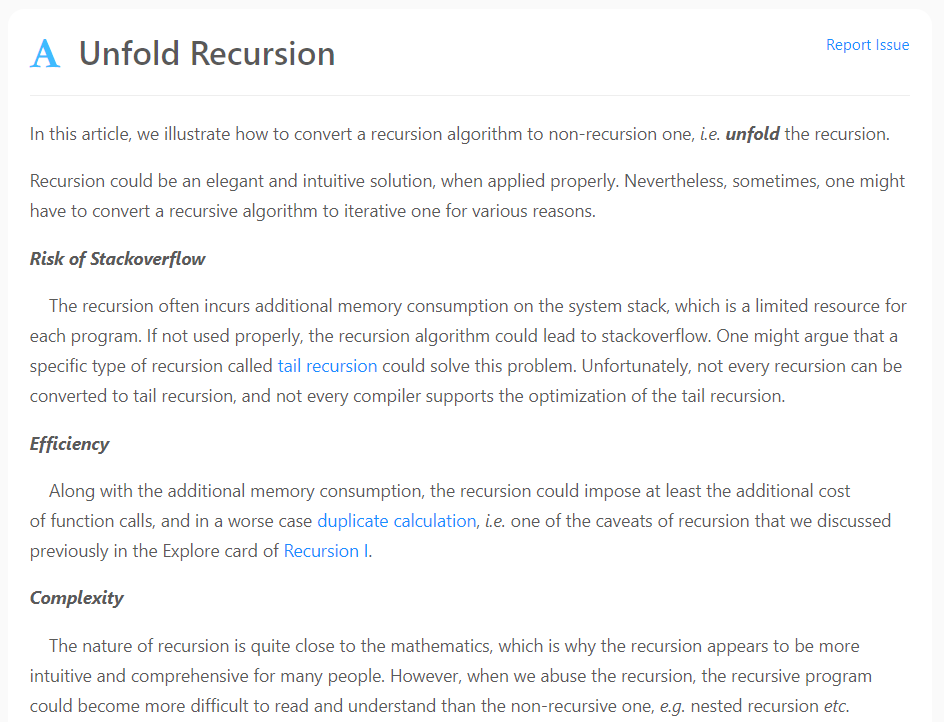

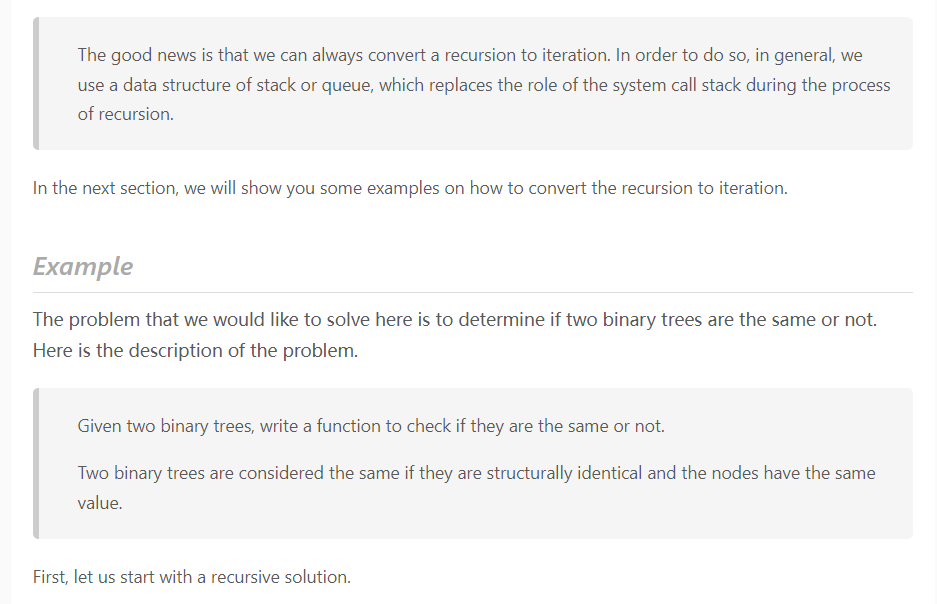

In [ ]:
class Solution:
    def isSameTree(self, p, q):
        """
        :type p: TreeNode
        :type q: TreeNode
        :rtype: bool
        """    
        # p and q are both None
        if not p and not q:
            return True
        # one of p and q is None
        if not q or not p:
            return False
        if p.val != q.val:
            return False
        return self.isSameTree(p.right, q.right) and \
               self.isSameTree(p.left, q.left)

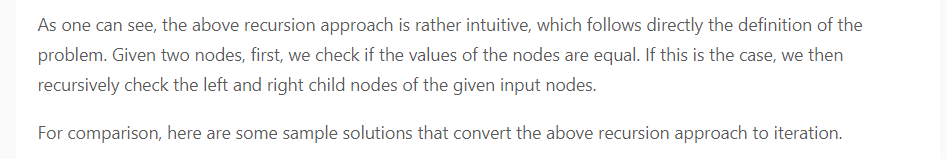

In [ ]:
from collections import deque
class Solution:
    def isSameTree(self, p, q):
        """
        :type p: TreeNode
        :type q: TreeNode
        :rtype: bool
        """    
        def check(p, q):
            # if both are None
            if not p and not q:
                return True
            # one of p and q is None
            if not q or not p:
                return False
            if p.val != q.val:
                return False
            return True
        
        deq = deque([(p, q),])
        while deq:
            p, q = deq.popleft()
            if not check(p, q):
                return False         
            if p:
                deq.append((p.left, q.left))
                deq.append((p.right, q.right))
        return True

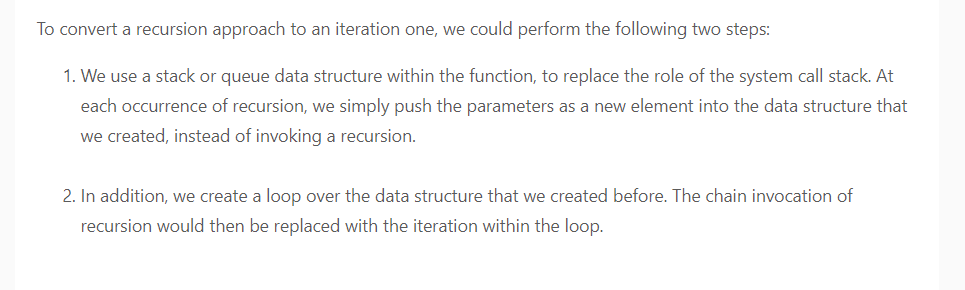

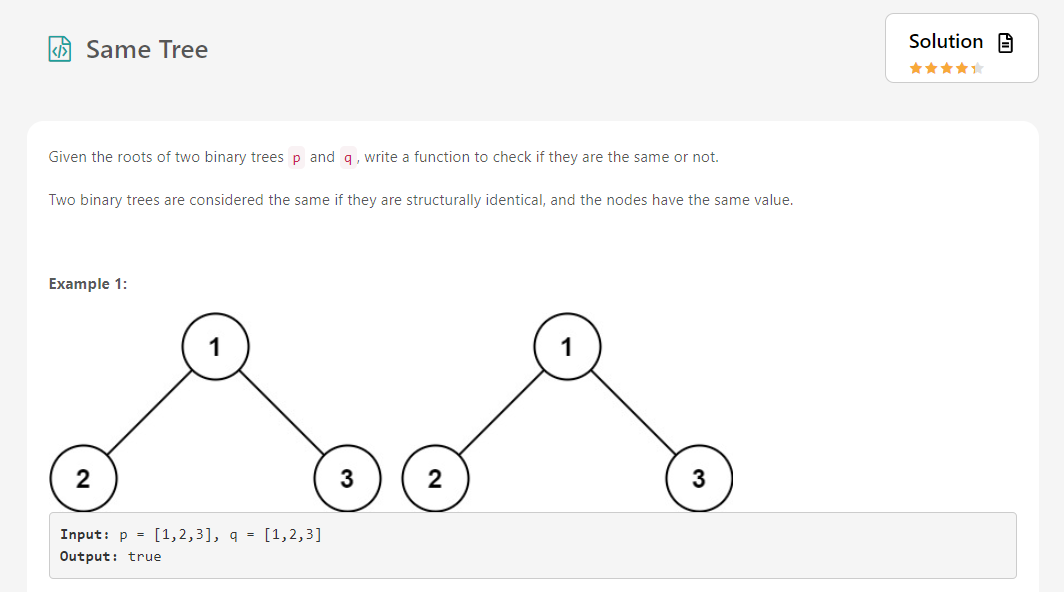

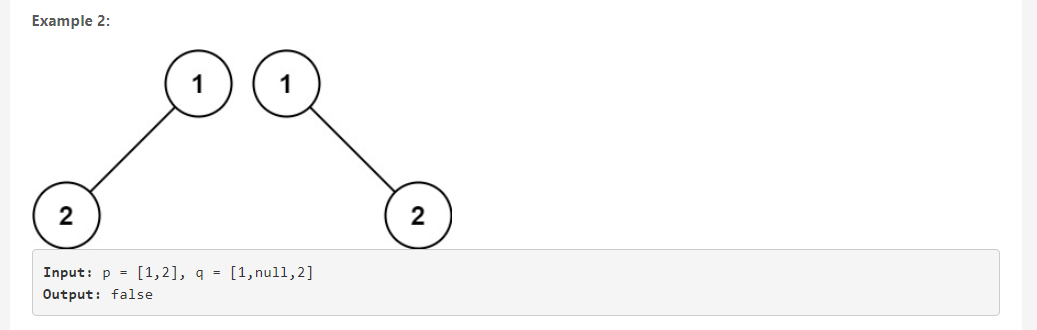

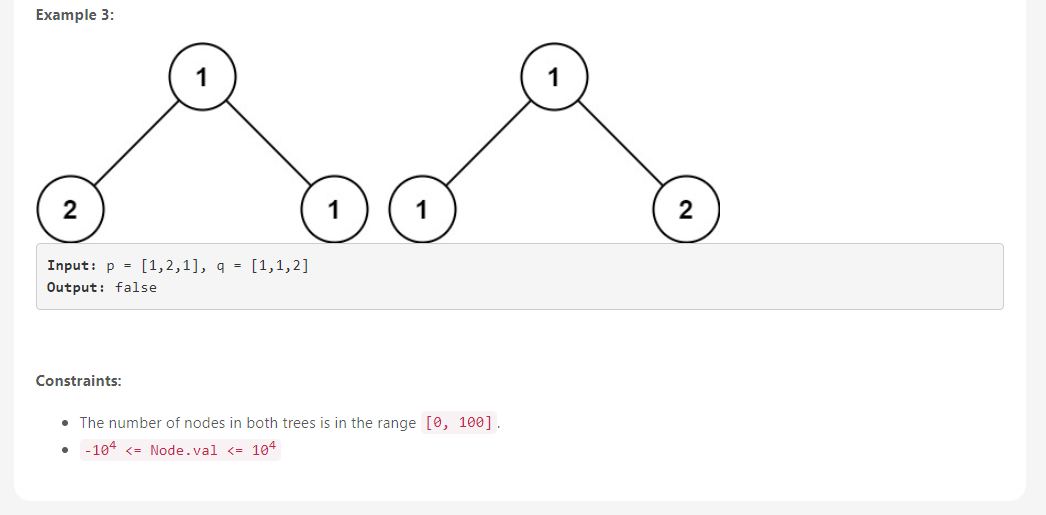

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

from collections import deque

class Solution:
    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        def check_same(p,q):
            if not p and not q:
                return True
            if not p or not q:
                return False
            if p.val==q.val:
                return True
            else:
                return False
        
        
        deq = deque([(p,q)])
        while(deq):
            p,q = deq.popleft()
            if not check_same(p,q):
                return False
            if p:
                deq.append((p.left,q.left))
                deq.append((p.right, q.right))

        return True

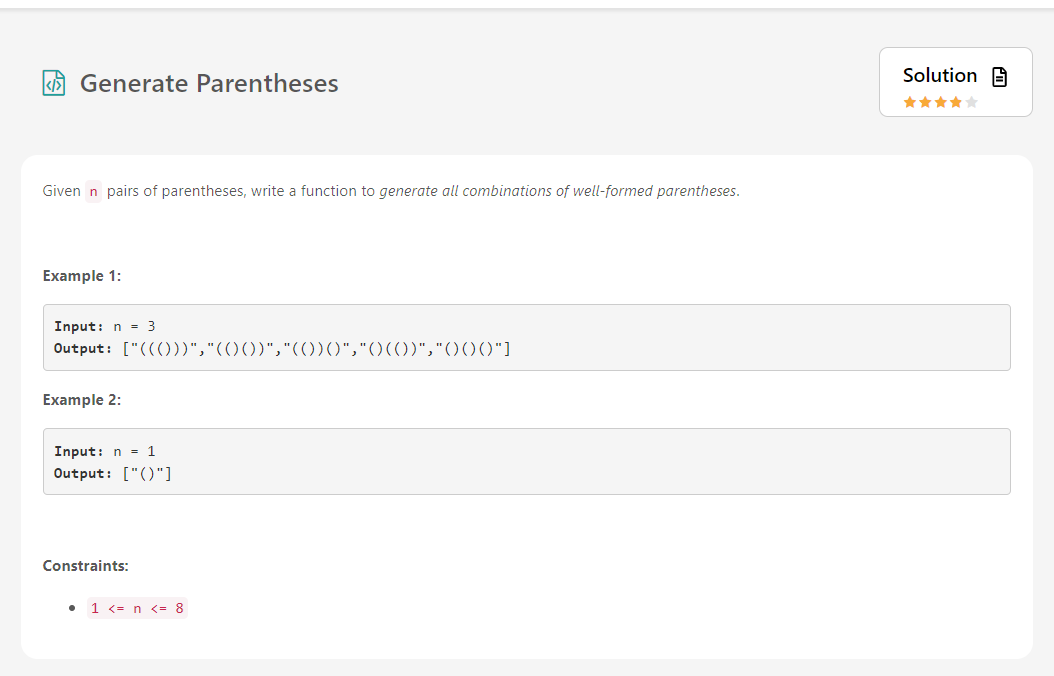

In [ ]:
# Accepted v1
from collections import deque
import copy
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        def check_valid(x,cur):
            a = 0
            b = 0
            for z in cur:
                if z=="(":
                    a+=1
                else:
                    b+=1
            if a==b and x==")":
                return False
            else:
                return True
            
        def check_form(cur):
            a = 0
            b = 0
            for z in cur:
                if z=="(":
                    a+=1
                else:
                    b+=1
            return a==b
            
        result = []
        deq = deque([['(']])
        while(deq):
            cur = deq.popleft()
            # print(cur)
            if len(cur)==2*n:
                if check_form(cur):
                    result.append(''.join(cur))
                continue
            
            if check_valid('(',cur):
                tmp=copy.copy(cur)
                tmp.append('(')
                deq.append(tmp)

            if check_valid(')',cur):
                tmp=copy.copy(cur)
                tmp.append(')')
                deq.append(tmp)
            
        return result

In [ ]:
# Approach 1: Brute Force
class Solution(object):
    def generateParenthesis(self, n):
        def generate(A = []):
            if len(A) == 2*n:
                if valid(A):
                    ans.append("".join(A))
            else:
                A.append('(')
                generate(A)
                A.pop()
                A.append(')')
                generate(A)
                A.pop()

        def valid(A):
            bal = 0
            for c in A:
                if c == '(': bal += 1
                else: bal -= 1
                if bal < 0: return False
            return bal == 0

        ans = []
        generate()
        return ans

In [ ]:
# Approach 2: Backtracking
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        ans = []
        def backtrack(S = [], left = 0, right = 0):
            if len(S) == 2 * n:
                ans.append("".join(S))
                return
            if left < n:
                S.append("(")
                backtrack(S, left+1, right)
                S.pop()
            if right < left:
                S.append(")")
                backtrack(S, left, right+1)
                S.pop()
        backtrack()
        return ans

In [ ]:
# Approach 3: Closure Number
class Solution(object):
    def generateParenthesis(self, N):
        if N == 0: return ['']
        ans = []
        for c in xrange(N):
            for left in self.generateParenthesis(c):
                for right in self.generateParenthesis(N-1-c):
                    ans.append('({}){}'.format(left, right))
        return ans

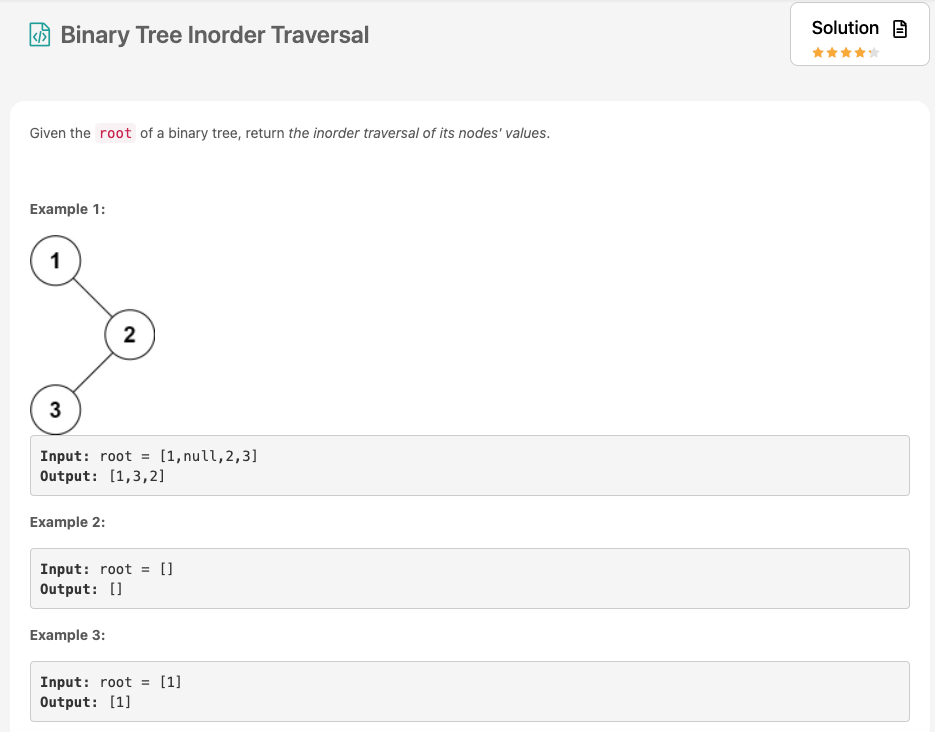

In [ ]:
# Binary Tree Inorder Traversal

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        result = []
        
        def parser(root):
            if not root:
                return
            parser(root.left)
            result.append(root.val)
            parser(root.right)
            return 
        
        parser(root)
        
        return result


In [ ]:
# Accepted v2
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

from collections import deque

class Solution:
    
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        if not root:
            return []
        
        res = []
        deq = deque()
        cur = root
        while (cur or deq):
            while (cur):
                deq.append(cur);
                cur = cur.left;
            cur = deq.pop();
            res.append(cur.val);
            cur = cur.right;
                
        return res


In [ ]:
# Approach 2: Iterating method using Stack
public class Solution {
    public List<Integer> inorderTraversal(TreeNode root) {
        List<Integer> res = new ArrayList<>();
        Stack<TreeNode> stack = new Stack<>();
        TreeNode curr = root;
        while (curr != null || !stack.isEmpty()) {
            while (curr != null) {
                stack.push(curr);
                curr = curr.left;
            }
            curr = stack.pop();
            res.add(curr.val);
            curr = curr.right;
        }
        return res;
    }
}

In [ ]:
# Approach 3: Morris Traversal
class Solution {
    public List<Integer> inorderTraversal(TreeNode root) {
        List<Integer> res = new ArrayList<>();
        TreeNode curr = root;
        TreeNode pre;
        while (curr != null) {
            if (curr.left == null) {
                res.add(curr.val);
                curr = curr.right; // move to next right node
            } else { // has a left subtree
                pre = curr.left;
                while (pre.right != null) { // find rightmost
                    pre = pre.right;
                }
                pre.right = curr; // put cur after the pre node
                TreeNode temp = curr; // store cur node
                curr = curr.left; // move cur to the top of the new tree
                temp.left = null; // original cur left be null, avoid infinite loops
            }
        }
        return res;
    }
}

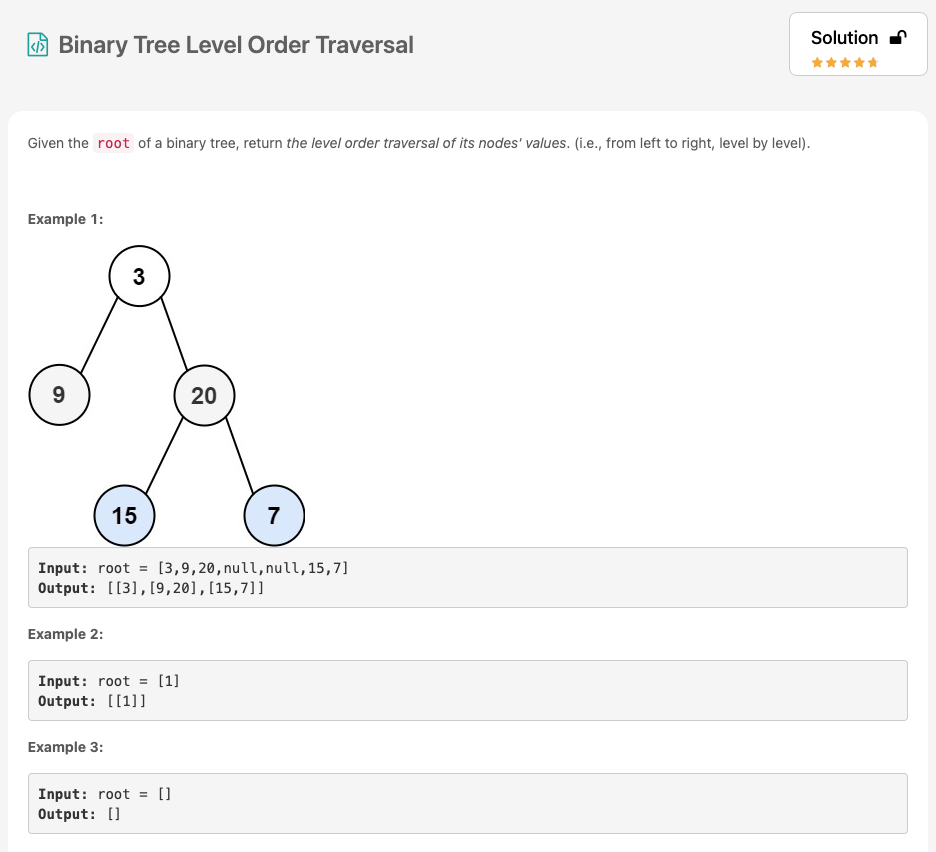

In [ ]:
# Binary Tree Level Order Traversal
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
from collections import deque
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        if not root:
            return []
        
        result = []
        deq = deque([(root,0)])
        while(deq):
            cur,level = deq.popleft()
            if level==len(result):
                result.append([cur.val])
            else:
                result[level].append(cur.val)
            
            if cur.left:
                deq.append((cur.left,level+1))
            
            if cur.right:
                deq.append((cur.right,level+1))
                
        return result

In [ ]:
# Approach 1: Recursion
class Solution:
    def levelOrder(self, root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        levels = []
        if not root:
            return levels
        
        def helper(node, level):
            # start the current level
            if len(levels) == level:
                levels.append([])

            # append the current node value
            levels[level].append(node.val)

            # process child nodes for the next level
            if node.left:
                helper(node.left, level + 1)
            if node.right:
                helper(node.right, level + 1)
            
        helper(root, 0)
        return levels